# HEART DISEASE PREDICTIONS


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we are going to use three different techniques or algorithms

  1 > KNeighborsClassifier
  2 > DecisionTreeClassifier
  3 > RandomForestClassifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


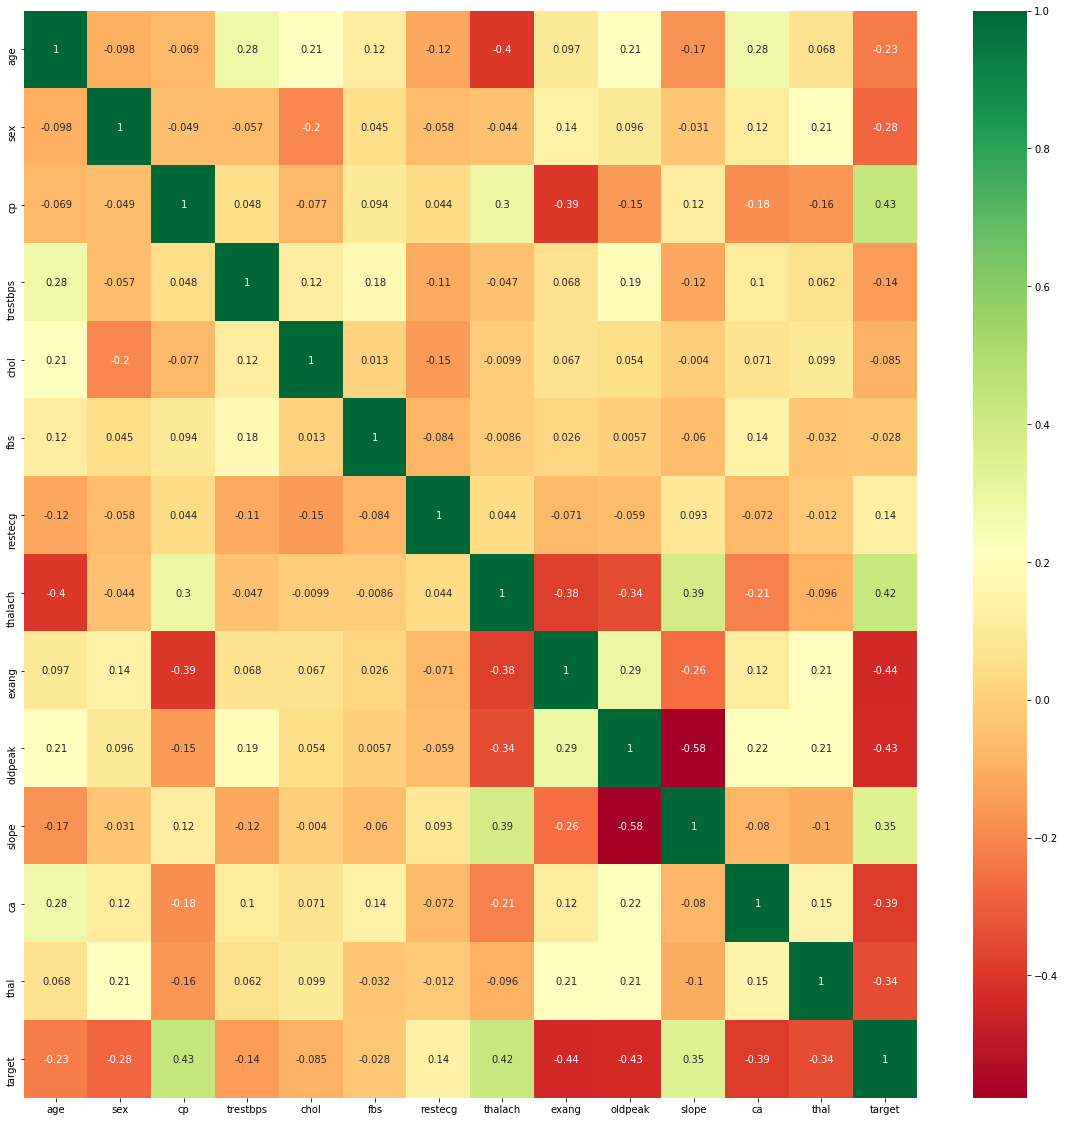

In [6]:
import seaborn as sns
corrmat = df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F27C84408>,
      dtype=object)

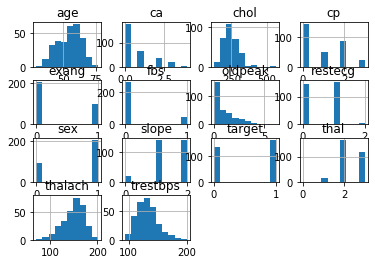

In [7]:
df.hist()

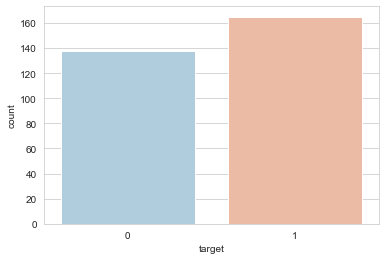

In [8]:
sns.set_style("whitegrid")
sns.countplot(x='target',data=df,palette='RdBu_r')

# Data processing 

In [9]:
dataset = pd.get_dummies(df,columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale] = ss.fit_transform(dataset[columns_to_scale])

In [11]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


Here above values are after scaling down 

In [12]:
Y = dataset['target']
X = dataset.drop(['target'],axis=1)

In [13]:
from sklearn.model_selection import cross_val_score

knn_scores=[]
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,X,Y,cv=10)
    knn_scores.append(score.mean())



Text(0.5, 1.0, 'Different k values for different k classifiers')

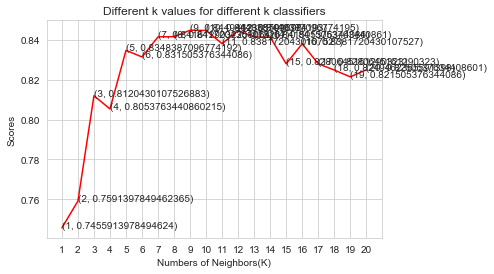

In [14]:
plt.plot([k for k in range(1,21)] , knn_scores,color="red")
for i in range(1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])

plt.xlabel("Numbers of Neighbors(K)")
plt.ylabel("Scores")

plt.title("Different k values for different k classifiers")

HERE WE FOUND AT K = 12 WE FOUND MAXIMUM SCORE OF 84%

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=12)
score = cross_val_score(knn_classifier,X,Y,cv=10)


In [16]:
score.mean()

0.8448387096774195

# Random Forest Classifier

In [17]:
randomforest_classifier = RandomForestClassifier(n_estimators = 10)

score = cross_val_score(randomforest_classifier,X,Y,cv=10)

In [18]:
score.mean()

0.8048387096774194

# Decision Tree Classifier

In [19]:
decisiontree_classifier = DecisionTreeClassifier(criterion='entropy')

score = cross_val_score(decisiontree_classifier,X,Y,cv=10)

In [20]:
print(score)

[0.83870968 0.70967742 0.87096774 0.83333333 0.66666667 0.7
 0.56666667 0.8        0.7        0.8       ]


In [21]:
score.mean()

0.7486021505376345

# Logistic classifier

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

score = cross_val_score(logreg,X,Y,cv=10)

In [23]:
print(score)

[0.90322581 0.90322581 0.83870968 0.93333333 0.86666667 0.76666667
 0.86666667 0.9        0.76666667 0.76666667]


In [24]:
score.mean()

0.8511827956989247

# USING TRAIN TEST SPLIT

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 5)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_predict = logreg.predict(x_test)
accuracy_score(y_test,y_predict)*100

91.80327868852459

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[27,  3],
       [ 2, 29]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.93      0.90      0.92        30\n           1       0.91      0.94      0.92        31\n\n    accuracy                           0.92        61\n   macro avg       0.92      0.92      0.92        61\nweighted avg       0.92      0.92      0.92        61\n'

# USING ADABOOST CLASSIFIER

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
ad = AdaBoostClassifier(learning_rate=0.2,n_estimators = 20)

In [30]:
ad.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=20, random_state=None)

In [31]:
y_pred = ad.predict(x_test)

In [32]:
accuracy_score(y_test,y_pred)*100

90.1639344262295

# HYPERPARAMETER TUNING USING GRIDSEARCHCV

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = [{"learning_rate":[0.1,0.2,0.4,0.6,0.8,1.0],"n_estimators":[10,20,30,40,50,60]}]

In [35]:
tuned_model = GridSearchCV(ad,param_grid=parameters,scoring='accuracy',cv=5)

In [36]:
grid_search = tuned_model.fit(x_train,y_train)

In [37]:
grid_search.best_score_

0.8387755102040817

In [38]:
grid_search.best_params_

{'learning_rate': 0.4, 'n_estimators': 20}

# Using svm and randomized search for hyperparameter tuning

In [39]:
from sklearn.svm import SVC

In [40]:
vector_model = SVC(C=1.4,kernel='linear',gamma=0.7)

In [41]:
vector_model.fit(x_train,y_train)

SVC(C=1.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_vector_pred = vector_model.predict(x_test)

In [43]:
accuracy_score(y_test,y_vector_pred)

0.9016393442622951

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
params= [{'C':[0.5,1.0,1.5,2.0,2.5,3.0],'kernel':['rbf']},
               
              {'C':[0.2,0.4,0.6,0.8,1.2,1.4],'kernel':['linear'],'gamma':[0.1,0.2,0.3,0.5,0.6,0.7]}
             
             ]

In [46]:
randomized_model = RandomizedSearchCV(vector_model,param_distributions=params,scoring='accuracy',cv=5)

In [47]:
tuned2_model = randomized_model.fit(x_train,y_train)

In [48]:
tuned2_model.best_score_

0.8308673469387756

In [49]:
tuned2_model.best_params_

{'kernel': 'linear', 'gamma': 0.7, 'C': 1.4}